<a href="https://colab.research.google.com/github/josephjvalavi/miniproject/blob/main/projectmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sb
import nltk
import re
import warnings
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB


In [3]:
df=pd.read_csv("/content/bbc-text.csv.zip")
df.head()
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [4]:
df.head

<bound method NDFrame.head of            category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]>

In [5]:
df.describe()


category                                               text
count      2225                                               2225
unique        5                                               2126
top       sport  s korea spending boost to economy south korea ...
freq        511                                                  2

In [6]:
import matplotlib  as plt
import numpy as np
table = pd.pivot_table(data=df,index='category',aggfunc=np.sum)
table

text
category                                                        
business       worldcom boss  left books alone  former worldc...
entertainment  ocean s twelve raids box office ocean s twelve...
politics       howard hits back at mongrel jibe michael howar...
sport          tigers wary of farrell  gamble  leicester say ...
tech           tv future in the hands of viewers with home th...

In [7]:
df.duplicated().sum()
df = df.drop_duplicates()

In [8]:
df.isnull().any()



category    False
text        False
dtype: bool

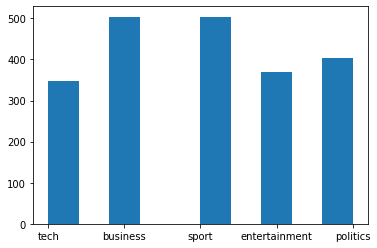

In [9]:
import matplotlib.pyplot as plt

plt.hist(df["category"])
labels = ("category")
plt.show()

In [10]:
df['num_characters'] = df['text'].apply(len)
df.tail()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


category  ... num_characters
2220       business  ...           1745
2221       politics  ...            955
2222  entertainment  ...           1648
2223       politics  ...           4684
2224          sport  ...           1167

[5 rows x 3 columns]

In [11]:
df.describe()

num_characters
count     2126.000000
mean      2262.765287
std       1382.011347
min        501.000000
25%       1437.500000
50%       1956.500000
75%       2801.500000
max      25483.000000

In [12]:
df.shape

(2126, 3)

In [13]:
df.isnull().any()

category          False
text              False
num_characters    False
dtype: bool

In [14]:
df["text_length"]=df["text"].str.len()
df["text_length"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       4333
1       1842
2       1342
3       2176
4       1579
        ... 
2220    1745
2221     955
2222    1648
2223    4684
2224    1167
Name: text_length, Length: 2126, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


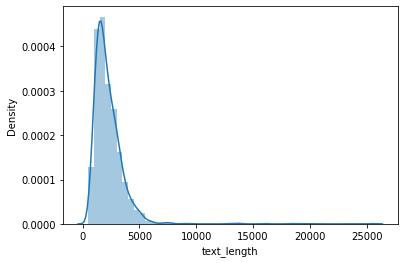

In [15]:
sb.distplot(df["text_length"])

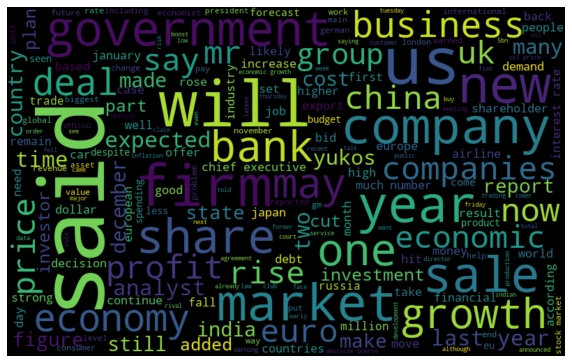

In [16]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=20,max_font_size=130).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
subset=df[df.category=="business"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

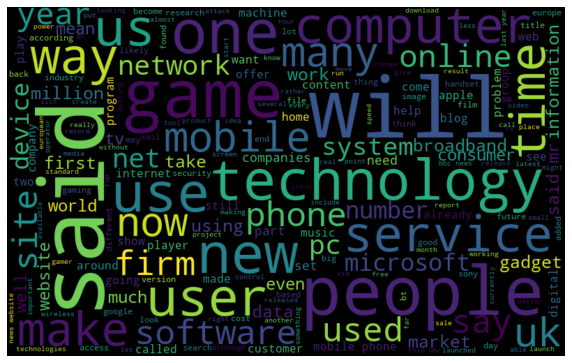

In [17]:
subset=df[df.category=="tech"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

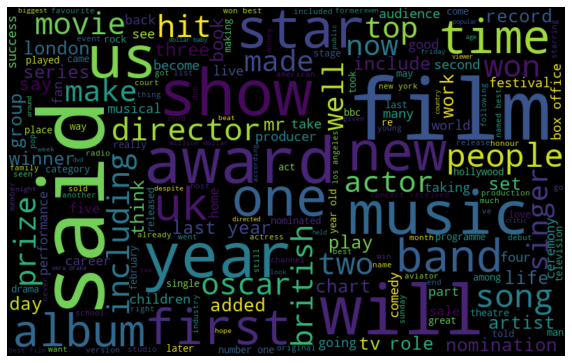

In [18]:
subset=df[df.category=="entertainment"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

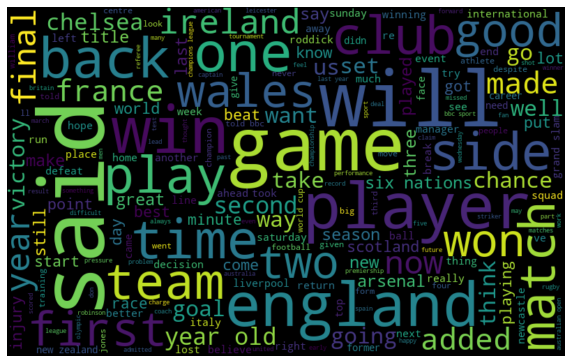

In [19]:
subset=df[df.category=="sport"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

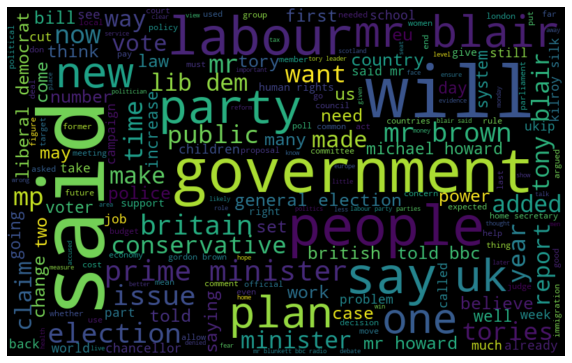

In [20]:
subset=df[df.category=="politics"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

STOPWORDS

In [21]:
stop_words = set(stopwords.words('english')) 
print(stop_words)

{'won', 'wouldn', 'hasn', 'both', 'ain', 'against', 'which', "don't", 'yourself', 'his', "it's", 'did', 'weren', 'didn', 'nor', 'd', 'being', 'here', 'because', 'yourselves', "wouldn't", 'haven', 'were', 'was', 'while', 'whom', 'most', 'be', 'what', 'some', 'we', 'very', 'himself', 'myself', 'few', "aren't", 'is', 'ours', 'do', 'up', 're', 'so', 'all', "hadn't", 'themselves', 'other', 'under', 'does', 'these', 'if', 'am', 'until', 'a', 'him', "that'll", 'your', 'where', 'when', 'to', 'of', "haven't", 'ma', 'i', 'been', "you'd", "you'll", 'had', 'have', 'or', 'than', "should've", 'about', "you're", 'out', 'in', 'she', 'from', 'below', 'any', 'can', 'through', 'again', 'as', 'at', 'down', "doesn't", "weren't", 'there', 'no', 'you', 'them', 'now', 'own', 'it', 'such', 'same', 'why', 'll', 'only', 'during', 'on', 'just', 'her', 'couldn', 'mightn', 'between', 'above', 'over', "won't", 'should', "couldn't", 'each', 'into', 'wasn', 'my', 'o', "isn't", 'm', 'further', 't', 's', 'has', 'an', 'w

In [22]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)

    tokens=word_tokenize(text)
    filtered_sentence=[]
    for f in tokens:
      if f not in stop_words:
        filtered_sentence.append(f) 
    text = " ".join(filtered_sentence)
    return(text)
    

   
    


In [23]:
df['text-parsed']=df['text'].apply(process_text)
df['text-parsed']
df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


category  ...                                        text-parsed
2220       business  ...  cars pull us retail figures us retail sales fe...
2221       politics  ...  kilroy unveils immigration policy exchatshow h...
2222  entertainment  ...  rem announce new glasgow concert us band rem a...
2223       politics  ...  political squabbles snowball become commonplac...
2224          sport  ...  souness delight euro progress boss graeme soun...

[5 rows x 5 columns]

In [24]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

label encoding


In [25]:
label_encoder=preprocessing.LabelEncoder()
df["category_encoded"]=label_encoder.fit_transform(df['category'])
df["category_encoded"]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


category  ... category_encoded
0           tech  ...                4
1       business  ...                0
2          sport  ...                3
3          sport  ...                3
4  entertainment  ...                1

[5 rows x 6 columns]

In [26]:
df["category_encoded"]= df["category_encoded"].map(str)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


category  ... category_encoded
0           tech  ...                4
1       business  ...                0
2          sport  ...                3
3          sport  ...                3
4  entertainment  ...                1

[5 rows x 6 columns]

In [27]:
df.to_csv('BBC_News_processed.csv')
df.head()

category  ... category_encoded
0           tech  ...                4
1       business  ...                0
2          sport  ...                3
3          sport  ...                3
4  entertainment  ...                1

[5 rows x 6 columns]

train test split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(df["text-parsed"],df["category_encoded"],test_size=0.2,random_state=8)
X_train.shape
X_test
y_train
y_test

1393    4
407     0
1076    1
1557    3
2073    3
       ..
1208    2
355     0
1940    3
1890    3
272     3
Name: category_encoded, Length: 426, dtype: object

tfidf vectoriser

In [29]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features=300


count vectorozer

In [30]:
#c=df["text-parsed"]
#vect=CountVectorizer()
#X = vect.fit_transform(c)
#print(vect.get_feature_names_out())



tfidf vectoriser

In [31]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)
print(features_train)
print(labels_train.shape)






(1700, 300)
[[0.         0.         0.         ... 0.05836596 0.06425587 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.23825165 0.         ... 0.08370471 0.         0.11023775]
 [0.         0.         0.         ... 0.         0.19555335 0.1114706 ]
 [0.         0.         0.         ... 0.11012329 0.         0.        ]]
(1700,)


In [32]:
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)
print(labels_test.shape)
print(features_test)

(426, 300)
(426,)
[[0.         0.         0.         ... 0.06191693 0.         0.        ]
 [0.         0.         0.         ... 0.09002578 0.09911059 0.1185625 ]
 [0.11458802 0.1250315  0.         ... 0.0743752  0.19539136 0.        ]
 ...
 [0.         0.         0.         ... 0.1210409  0.13325556 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.10780734 0.        ]]


In [33]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train,labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))
print(model_predictions)
print(confusion_matrix(y_test,model_predictions))

Accuracy:  0.9225352112676056
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       102
           1       0.86      0.94      0.90        78
           2       0.92      0.90      0.91        77
           3       0.95      0.97      0.96       107
           4       0.96      0.89      0.92        62

    accuracy                           0.92       426
   macro avg       0.92      0.92      0.92       426
weighted avg       0.92      0.92      0.92       426

['4' '0' '1' '3' '3' '0' '3' '3' '3' '1' '4' '0' '0' '2' '1' '3' '3' '1'
 '1' '1' '3' '2' '2' '3' '0' '2' '3' '3' '3' '4' '1' '4' '1' '2' '0' '0'
 '2' '4' '0' '0' '3' '3' '3' '3' '3' '1' '0' '2' '3' '3' '0' '4' '3' '0'
 '2' '3' '2' '4' '2' '4' '4' '2' '2' '1' '3' '0' '3' '0' '0' '1' '1' '0'
 '0' '2' '3' '3' '1' '3' '0' '3' '1' '1' '2' '4' '4' '4' '0' '0' '3' '3'
 '0' '1' '0' '0' '1' '0' '1' '0' '3' '0' '3' '1' '3' '3' '2' '1' '1' '0'
 '3' '4' '4' '2' '4' '2' '0' '0' '4' '1' '2

In [34]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9225352112676056
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       102
           1       0.86      0.94      0.90        78
           2       0.92      0.90      0.91        77
           3       0.95      0.97      0.96       107
           4       0.96      0.89      0.92        62

    accuracy                           0.92       426
   macro avg       0.92      0.92      0.92       426
weighted avg       0.92      0.92      0.92       426



In [36]:
model = MultinomialNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))
print(model_predictions)
print(confusion_matrix(y_test,model_predictions))

Accuracy:  0.9413145539906104
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       102
           1       0.96      0.94      0.95        78
           2       0.96      0.92      0.94        77
           3       0.95      0.97      0.96       107
           4       0.89      0.89      0.89        62

    accuracy                           0.94       426
   macro avg       0.94      0.94      0.94       426
weighted avg       0.94      0.94      0.94       426

['4' '0' '1' '3' '3' '0' '3' '3' '3' '1' '4' '0' '0' '2' '1' '3' '3' '1'
 '1' '1' '3' '2' '2' '3' '0' '0' '3' '3' '3' '4' '1' '4' '1' '0' '0' '0'
 '2' '4' '0' '0' '3' '3' '3' '3' '3' '1' '0' '2' '3' '3' '0' '4' '3' '0'
 '2' '3' '2' '4' '2' '4' '4' '2' '2' '2' '3' '0' '3' '0' '0' '4' '1' '0'
 '0' '2' '3' '3' '1' '3' '0' '3' '1' '1' '2' '4' '4' '4' '0' '0' '3' '3'
 '0' '1' '0' '0' '1' '0' '1' '0' '3' '4' '4' '1' '3' '3' '2' '1' '1' '0'
 '3' '4' '4' '2' '4' '2' '0' '2' '4' '1' '2

TypeError: ignored

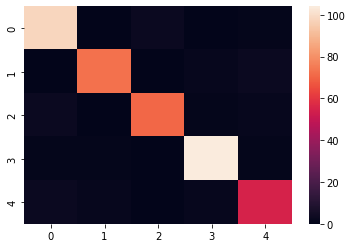

In [37]:


sb.heatmap(confusion_matrix(y_test,model_predictions))


In [38]:
bbc = pd.DataFrame()
bbc['text'] = df['text-parsed']
bbc['category'] = df['category_encoded']
bbc.head()

text category
0  tv future hands viewers home theatre systems p...        4
1  worldcom boss left books alone former worldcom...        0
2  tigers wary farrell gamble leicester say rushe...        3
3  yeading face newcastle fa cup premiership side...        3
4  ocean twelve raids box office ocean twelve cri...        1

In [39]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []

    
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


X_train, X_test, y_train, y_test = train_test_split(bbc.text, bbc.category, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [40]:
all_data[0:5]

[TaggedDocument(words=['howard', 'dismisses', 'tory', 'tax', 'fears', 'michael', 'howard', 'dismissed', 'fears', 'conservatives', 'plans', '4bn', 'tax', 'cuts', 'modest', 'defended', 'package', 'saying', 'plan', 'tories', 'first', 'budget', 'hoped', 'able', 'go', 'tories', 'monday', 'highlighted', '35bn', 'wasteful', 'spending', 'would', 'stop', 'allow', 'tax', 'cuts', 'reduced', 'borrowing', 'spending', 'key', 'services', 'labour', 'liberal', 'democrats', 'say', 'party', 'sums', 'add', 'claim', 'would', 'cut', 'frontline', 'services', 'tory', 'tax', 'plan', 'follows', 'complaints', 'party', 'mps', 'mr', 'howard', 'shadow', 'chancellor', 'oliver', 'letwin', 'taken', 'long', 'unveil', 'proposals', 'promised', 'figure', 'yet', 'reveal', 'taxes', 'would', 'targeted', 'tory', 'backbencher', 'edward', 'leigh', 'said', 'proposals', 'step', 'right', 'direction', 'told', 'financial', 'times', 'would', 'come', 'sooner', 'much', 'greater', 'tax', 'cuts', 'interviewed', 'bbc', 'radio', '2', 'jere

In [41]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 2126/2126 [00:00<00:00, 1481490.33it/s]


In [42]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

accuracy 0.9561128526645768
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       162
           1       0.94      0.95      0.94        96
           2       0.97      0.95      0.96       128
           3       0.99      0.99      0.99       141
           4       0.95      0.92      0.94       111

    accuracy                           0.96       638
   macro avg       0.96      0.95      0.95       638
weighted avg       0.96      0.96      0.96       638

[[157   1   3   0   1]
 [  1  91   0   1   3]
 [  3   2 121   1   1]
 [  2   0   0 139   0]
 [  5   3   1   0 102]]


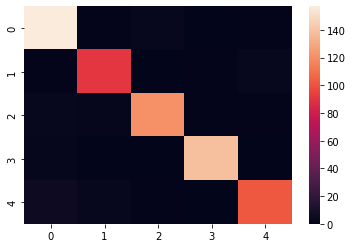

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(n_jobs=1, C=1e5)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))
print(confusion_matrix(y_test,model_prediction))
sb.heatmap(confusion_matrix(y_test,model_prediction))
